In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',1000)

In [2]:
df_train = pd.read_csv('training_data/train_data.csv')
df_targets = pd.read_csv('targets/targets.csv')
df_train.head()

,Players,club,age,Position,short_passing,dribbling,long_passing,ball_control,interceptions,positioning,vision,marking,gk_handling,gk_reflexes,Goals-16/17,A-16/17,CS-16/17,Yellow-16/17,Red-16/17,Off-16/17,Pen_SV-16/17,Pen_M-16/17,Goals_conceded-16/17,OG-16/17,Apps-16/17,Form-16/17,Goals-15/16,A-15/16,CS-15/16,Yellow-15/16,Red-15/16,Off-15/16,Pen_SV-15/16,Pen_M-15/16,Goals_conceded-15/16,OG-15/16,Apps-15/16,Form-15/16
0,Aaron Cresswell,West Ham United,27,Defender,72,76,68,75,71,63,68,76,7,12,0,2,5,3,0,3,0,0,37,0,26,2.269231,2,4,11,1,0,1,0,0,50,0,37,3.108108
1,Aaron Hunt,Hamburger SV,30,Midfielder,78,75,68,80,55,75,74,28,12,15,4,2,0,3,0,7,0,1,0,0,22,2.590909,1,2,0,2,0,7,0,0,0,1,22,2.136364
2,Aaron Lennon,Everton,30,Midfielder,76,82,54,80,42,71,73,40,7,11,0,1,0,0,0,5,0,0,0,0,11,1.818182,5,1,0,1,0,8,0,0,0,0,25,2.760000
3,Aaron Ramsey,Arsenal,26,Midfielder,84,81,80,82,69,82,80,60,11,8,1,4,0,3,0,3,0,0,0,0,23,2.173913,5,5,0,4,0,2,0,0,0,0,31,3.096774
4,Abdoulaye Doucoure,Watford,24,Midfielder,82,78,74,80,78,73,77,70,12,14,1,0,0,4,0,3,0,0,0,0,20,1.750000,2,4,0,6,0,3,0,0,0,0,31,2.279167


In [3]:
df_train.describe()

,age,short_passing,dribbling,long_passing,ball_control,interceptions,positioning,vision,marking,gk_handling,gk_reflexes,Goals-16/17,A-16/17,CS-16/17,Yellow-16/17,Red-16/17,Off-16/17,Pen_SV-16/17,Pen_M-16/17,Goals_conceded-16/17,OG-16/17,Apps-16/17,Form-16/17,Goals-15/16,A-15/16,CS-15/16,Yellow-15/16,Red-15/16,Off-15/16,Pen_SV-15/16,Pen_M-15/16,Goals_conceded-15/16,OG-15/16,Apps-15/16,Form-15/16
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,26.958885,69.314286,65.090592,63.509408,69.225087,57.338676,59.091986,63.041812,52.471777,16.096167,16.383972,2.460627,1.671080,1.978397,3.312892,0.093380,4.733798,0.045296,0.068990,11.429268,0.051568,22.233449,2.363065,2.388153,1.684321,2.282230,3.399303,0.088502,4.737282,0.038328,0.055052,10.951220,0.073868,22.698258,2.421104
std,3.976445,13.939780,19.397951,14.151960,16.538790,22.404756,21.139700,14.653066,24.415962,18.655781,19.829775,4.280647,2.307097,3.523020,2.904874,0.311884,4.777352,0.277033,0.289483,17.554251,0.236466,10.331290,1.070263,4.182450,2.436358,3.972947,2.946785,0.300813,4.863116,0.254516,0.272714,16.495606,0.282164,10.327562,1.031030
min,18.000000,12.000000,6.000000,12.000000,10.000000,10.000000,4.000000,12.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.000000
25%,24.000000,66.000000,60.000000,58.000000,67.000000,36.000000,49.000000,55.000000,27.000000,8.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.714286,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.777778
50%,27.000000,73.000000,71.000000,67.000000,74.000000,68.000000,66.000000,66.000000,63.000000,11.000000,11.000000,1.000000,1.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2.212121,1.000000,1.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2.281250
75%,30.000000,78.000000,77.000000,74.000000,79.000000,76.000000,75.000000,74.000000,74.000000,14.000000,14.000000,3.000000,2.000000,3.000000,5.000000,0.000000,7.000000,0.000000,0.000000,22.000000,0.000000,31.000000,2.941176,3.000000,2.000000,4.000000,5.000000,0.000000,7.000000,0.000000,0.000000,22.000000,0.000000,31.000000,2.932184
max,39.000000,92.000000,97.000000,93.000000,95.000000,92.000000,95.000000,92.000000,92.000000,91.000000,90.000000,37.000000,18.000000,18.000000,14.000000,2.000000,25.000000,4.000000,3.000000,82.000000,2.000000,38.000000,8.500000,40.000000,19.000000,24.000000,17.000000,2.000000,30.000000,4.000000,3.000000,67.000000,2.000000,60.000000,9.225806


In [4]:
# Checking for null values in feature data
df_train.isnull().any()

Players                 False
club                    False
age                     False
Position                False
short_passing           False
dribbling               False
long_passing            False
ball_control            False
interceptions           False
positioning             False
vision                  False
marking                 False
gk_handling             False
gk_reflexes             False
Goals-16/17             False
A-16/17                 False
CS-16/17                False
Yellow-16/17            False
Red-16/17               False
Off-16/17               False
Pen_SV-16/17            False
Pen_M-16/17             False
Goals_conceded-16/17    False
OG-16/17                False
Apps-16/17              False
Form-16/17              False
Goals-15/16             False
A-15/16                 False
CS-15/16                False
Yellow-15/16            False
Red-15/16               False
Off-15/16               False
Pen_SV-15/16            False
Pen_M-15/1

In [5]:
# Checking for null values in targeet data
df_targets['overall'].isnull().any()

False

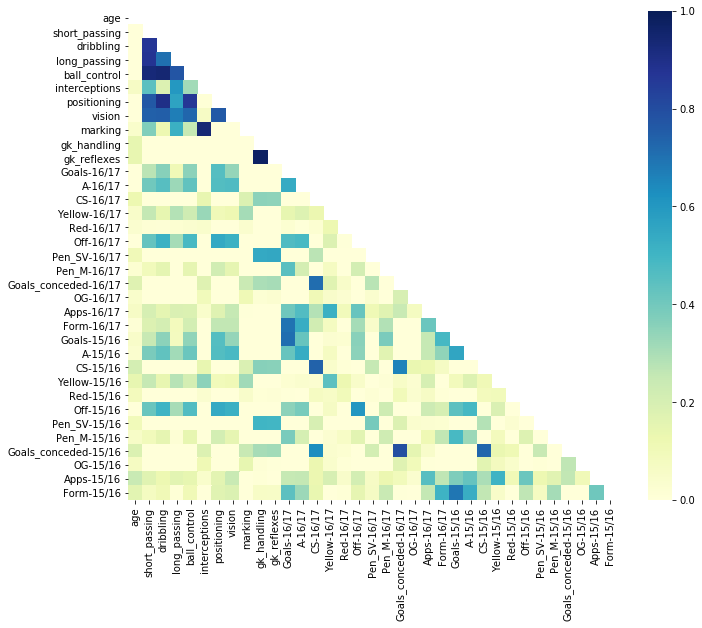

In [6]:
# Checking feature correlation using correlation matrix
df_train_num = df_train.select_dtypes(include = ['number'])
df_train_corr = df_train_num.corr()
mask = np.triu(np.ones_like(df_train_corr, dtype = np.bool))
f,ax = plt.subplots(figsize = (11,9))
sns.heatmap(df_train_corr, mask = mask, square = True, vmin = 0, vmax = 1, cmap = 'YlGnBu')